# Neural Networks

## Statistical Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error
from keras.models import Sequential
from keras.layers import Activation, Dense, Dropout, Embedding, Flatten, Conv1D, MaxPooling1D, LSTM
from keras.callbacks import EarlyStopping
from keras import utils
from sklearn.model_selection import train_test_split

In [2]:
dataset = pd.read_csv('https://github.com/ShrivardhanGoenka/Nothing/blob/main/dataCleaned.csv?raw=true')

In [3]:
final_X_Data = dataset[['duration_ms', 'danceability', 'energy','key', 'loudness','mode','speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']]

In [4]:
final_Y_Data = dataset['popularity']

In [5]:
X_train, X_test, Y_train, Y_test = train_test_split(final_X_Data, final_Y_Data, test_size=0.2, random_state=0)

In [6]:
print('Size of training data:', len(X_train))
print('Size of testing data:', len(X_test))

Size of training data: 33536
Size of testing data: 8385


In [7]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33536 entries, 18937 to 2732
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   duration_ms       33536 non-null  float64
 1   danceability      33536 non-null  float64
 2   energy            33536 non-null  float64
 3   key               33536 non-null  float64
 4   loudness          33536 non-null  float64
 5   mode              33536 non-null  float64
 6   speechiness       33536 non-null  float64
 7   acousticness      33536 non-null  float64
 8   instrumentalness  33536 non-null  float64
 9   liveness          33536 non-null  float64
 10  valence           33536 non-null  float64
 11  tempo             33536 non-null  float64
dtypes: float64(12)
memory usage: 3.3 MB


In [8]:
callback = EarlyStopping(monitor='val_loss', patience = 8)

In [9]:
Model1 = Sequential()

Model1.add(Dense(32, activation='relu', input_dim=X_train.shape[1]))
Model1.add(Dense(16, activation='relu'))
Model1.add(Dense(8, activation='relu'))
Model1.add(Dense(1, activation='linear'))

In [10]:
# Compile the model
Model1.compile(loss='mean_squared_error', optimizer='adam')


In [11]:
history = Model1.fit(x = X_train,y=  Y_train,validation_data=(X_test, Y_test) , epochs=100, batch_size=32, callbacks=callback)

Epoch 1/100
1048/1048 [==============================] - 3s 2ms/step - loss: 0.0301 - val_loss: 0.0299
Epoch 2/100
1048/1048 [==============================] - 2s 2ms/step - loss: 0.0285 - val_loss: 0.0280
Epoch 3/100
1048/1048 [==============================] - 2s 2ms/step - loss: 0.0283 - val_loss: 0.0273
Epoch 4/100
1048/1048 [==============================] - 3s 3ms/step - loss: 0.0281 - val_loss: 0.0277
Epoch 5/100
1048/1048 [==============================] - 2s 2ms/step - loss: 0.0279 - val_loss: 0.0272
Epoch 6/100
1048/1048 [==============================] - 2s 2ms/step - loss: 0.0277 - val_loss: 0.0270
Epoch 7/100
1048/1048 [==============================] - 2s 2ms/step - loss: 0.0276 - val_loss: 0.0269
Epoch 8/100
1048/1048 [==============================] - 2s 2ms/step - loss: 0.0274 - val_loss: 0.0270
Epoch 9/100
1048/1048 [==============================] - 3s 3ms/step - loss: 0.0273 - val_loss: 0.0271
Epoch 10/100
1048/1048 [==============================] - 2s 2ms/step - l

<Axes: >

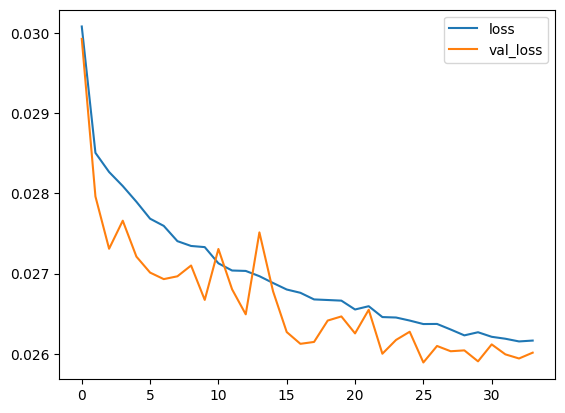

In [12]:
model_losses = pd.DataFrame(Model1.history.history)
model_losses.plot()

In [13]:
predictions = Model1.predict(X_test)

263/263 [==============================] - 0s 1ms/step


## Model Performance

In [14]:
mean_absolute_error(Y_test, predictions)

0.1270828745284773

In [15]:
mean_squared_error(Y_test, predictions)

0.026014470953904592